# Setup

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
# Constants
data_path = './data/data.pickle'

# Load data

In [221]:
df = pd.DataFrame(pd.read_pickle(data_path))
df

,id,title,user,comments,state,labels,created_at,updated_at,closed_at
0,1181447341,Multi level subdomain is not allowed after Rai...,r7kamura,0,open,[],2022-03-26T01:33:06Z,2022-03-26T01:33:34Z,None
1,1181332714,Remove override of ActiveModel#attribute_names,kevindew,0,open,"[activemodel, activerecord]",2022-03-25T22:39:33Z,2022-03-26T10:50:30Z,None
2,1180116072,Allow nested access for `secrets.yml` via meth...,ghousemohamed,0,open,[railties],2022-03-24T22:27:02Z,2022-03-25T14:52:53Z,None
3,1179461903,rich_text_area field with model validation err...,scottdavis,0,open,[actiontext],2022-03-24T12:40:30Z,2022-03-25T20:34:51Z,None
4,1179132566,`db:fixtures:load` raises in Postgres if there...,lxxxvi,0,open,[activerecord],2022-03-24T07:46:28Z,2022-03-24T07:46:31Z,None
...,...,...,...,...,...,...,...,...,...
495,192343588,Including ActionView::Rendering in API control...,jpettettphaxio,15,open,"[actionpack, needs feedback, actionview, With ...",2016-11-29T17:14:26Z,2020-08-03T23:42:22Z,None
496,188229942,ActionCable streaming performance,palkan,7,open,"[needs feedback, attached PR, actioncable]",2016-11-09T11:55:21Z,2018-10-08T17:41:02Z,None
497,185765476,`deliver_later` raises unnecessarily due to ov...,derekprior,4,open,"[actionmailer, needs feedback, With reproducti...",2016-10-27T19:59:05Z,2021-06-21T19:33:07Z,None
498,181509062,When a parent model has `before/after_commit/r...,cannikin,10,open,"[activerecord, needs feedback, With reproducti...",2016-10-06T19:50:35Z,2020-05-19T02:01:28Z,None


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          500 non-null    int64 
 1   title       500 non-null    object
 2   user        500 non-null    object
 3   comments    500 non-null    int64 
 4   state       500 non-null    object
 5   labels      500 non-null    object
 6   created_at  500 non-null    object
 7   updated_at  500 non-null    object
 8   closed_at   0 non-null      object
dtypes: int64(2), object(7)
memory usage: 35.3+ KB


The dataframe info helps us notice that there are no value for the `closed_at` attribute. We will double check that information below using the `state` attribute.

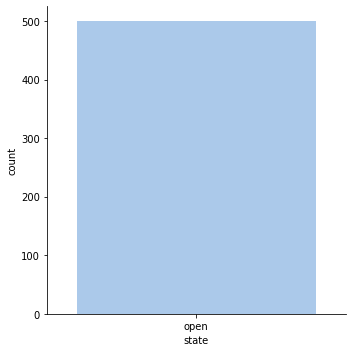

In [223]:
sns.catplot(x='state', kind='count', palette='pastel', data=df)

We can clearly see that all the 500 latest issues are still opened.

Before we continue, let us fix some columns types

In [224]:
# date & time columns
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])

# one hot encode labels
labels = df['labels'].str.join('|').str.get_dummies()

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   id          500 non-null    int64              
 1   title       500 non-null    object             
 2   user        500 non-null    object             
 3   comments    500 non-null    int64              
 4   state       500 non-null    object             
 5   labels      500 non-null    object             
 6   created_at  500 non-null    datetime64[ns, UTC]
 7   updated_at  500 non-null    datetime64[ns, UTC]
 8   closed_at   0 non-null      object             
dtypes: datetime64[ns, UTC](2), int64(2), object(5)
memory usage: 35.3+ KB


We now have correct date time types for `created_at` and `updated_at` columns. We left `closed_at` column as it is not useful.

In [226]:
labels

,PostgreSQL,With reproduction steps,actioncable,actionmailbox,actionmailer,actionpack,actiontext,actionview,activejob,activemodel,...,parallel testing,pinned,rails-ujs,railties,ready,regression,routing,security,stale,third party issue
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This shows that there are 31 distincts labels for the latest 500 issues.

# Q1-2. Evolution of the number of issues 

In [227]:
df['created_at'].dt.floor('d')

0     2022-03-26 00:00:00+00:00
1     2022-03-25 00:00:00+00:00
2     2022-03-24 00:00:00+00:00
3     2022-03-24 00:00:00+00:00
4     2022-03-24 00:00:00+00:00
                 ...           
495   2016-11-29 00:00:00+00:00
496   2016-11-09 00:00:00+00:00
497   2016-10-27 00:00:00+00:00
498   2016-10-06 00:00:00+00:00
499   2016-09-11 00:00:00+00:00
Name: created_at, Length: 500, dtype: datetime64[ns, UTC]

In [228]:
from datetime import datetime

def plot_evolution(ts, per:str='D', title='', width=20, height=4, reindex:bool=False, reindex_freq:str='D'):
    # Number of issues per period
    s = ts['created_at'].groupby(ts['created_at'].values.astype(f'datetime64[{per}]')).size()
    if reindex:
        # create timeseries and fill empty values with 0
        start = datetime(s.index.min().year, 1, 1)
        end = datetime(s.index.max().year, 12, 31)
        idx = pd.date_range(start, end, freq=reindex_freq)
        s = s.reindex(idx, fill_value=0)
    plt.figure(figsize=(width, height))
    sns.lineplot(x=s.index, y=s.values, palette='pastel').set(title=title)

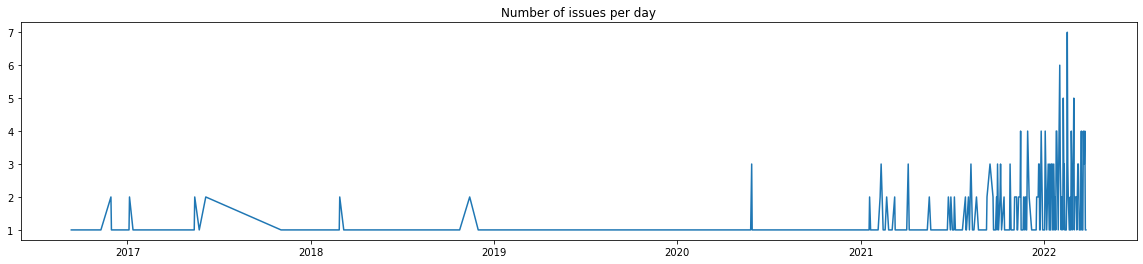

In [229]:
# Number of issues per day
plot_evolution(df, title='Number of issues per day', reindex=False)

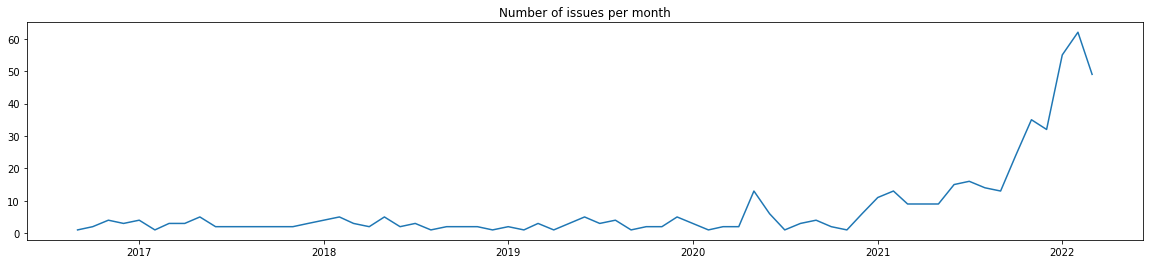

In [230]:
# Number of issues per month
plot_evolution(df, per='M', title='Number of issues per month', reindex=False, reindex_freq='MS')

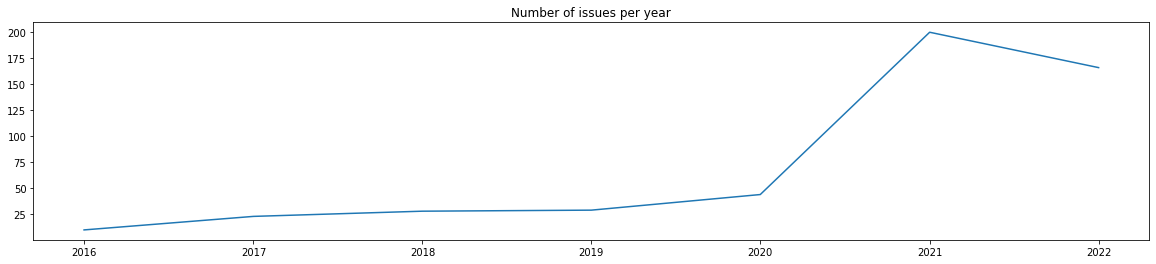

In [231]:
# Number of issues per year
plot_evolution(df, per='Y', title='Number of issues per year')

In [232]:
df['creation_year'] = pd.DatetimeIndex(df['created_at']).year
years = np.unique(df['creation_year'])
years = np.sort(years)[::-1]
years

array([2022, 2021, 2020, 2019, 2018, 2017, 2016])

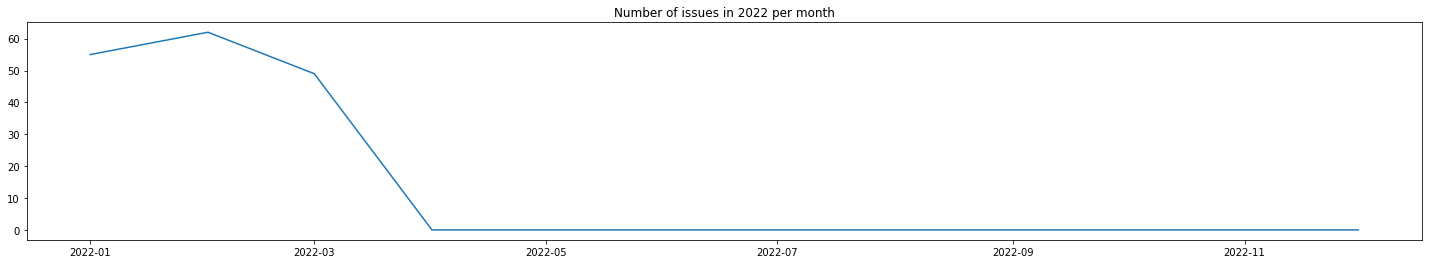

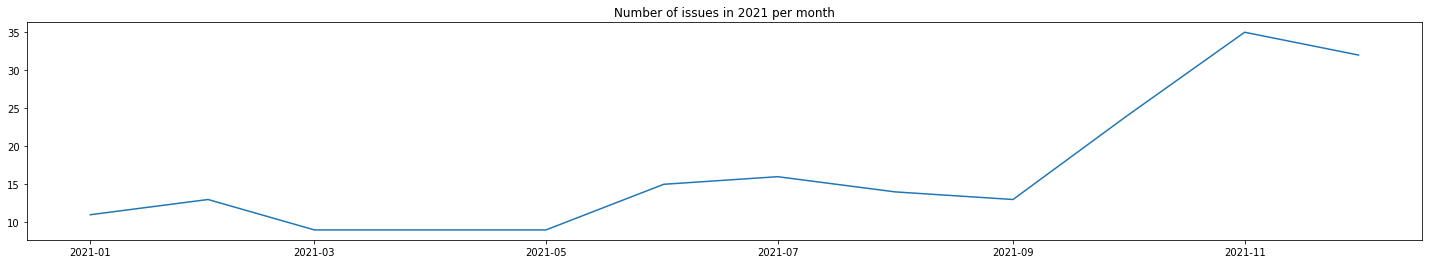

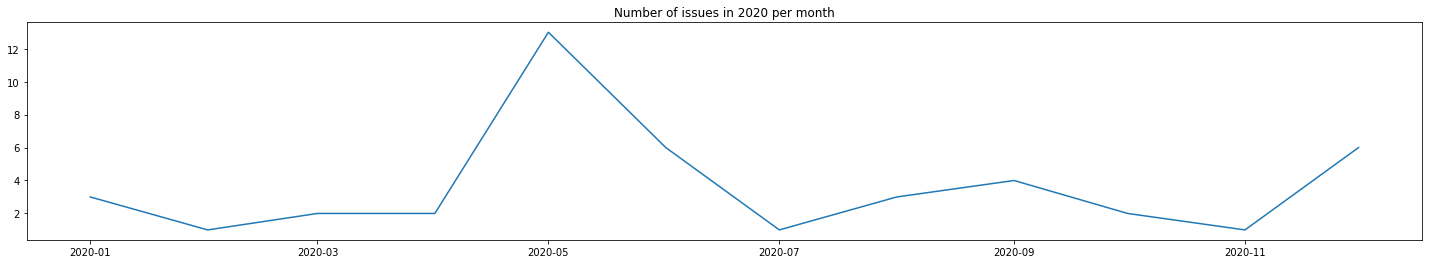

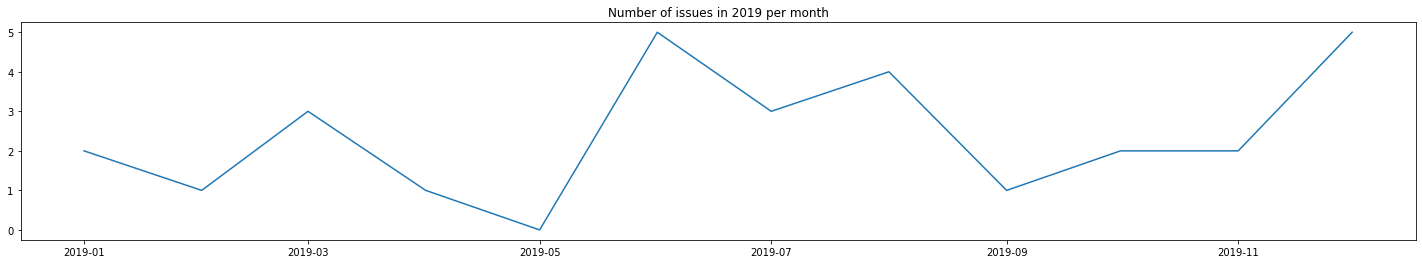

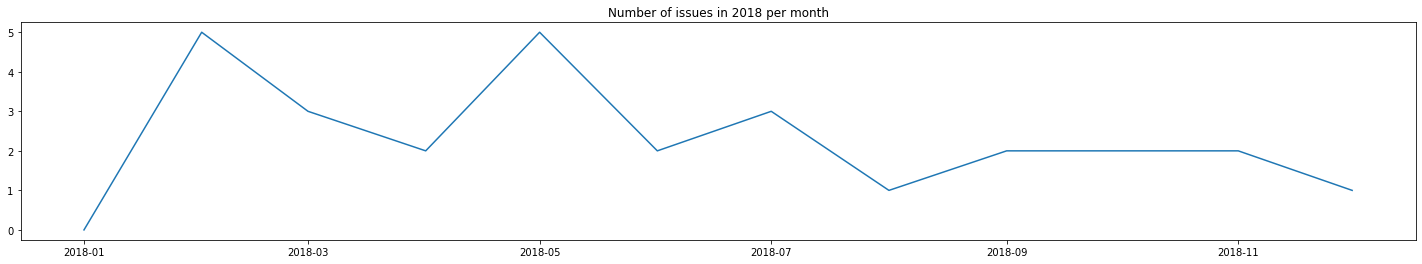

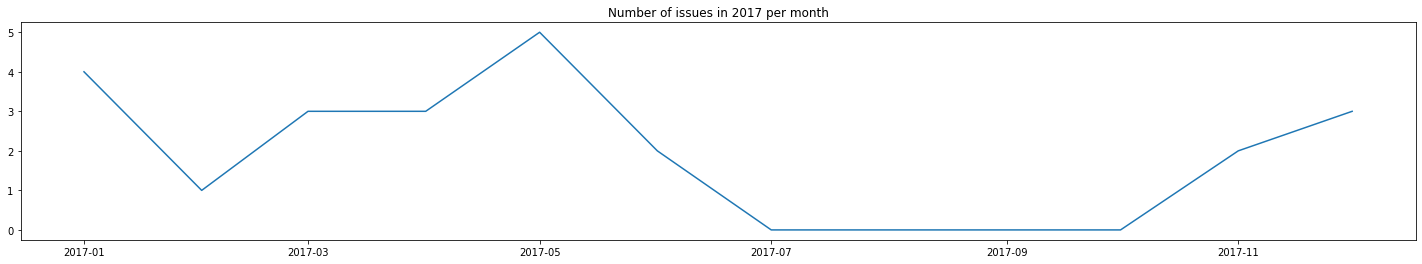

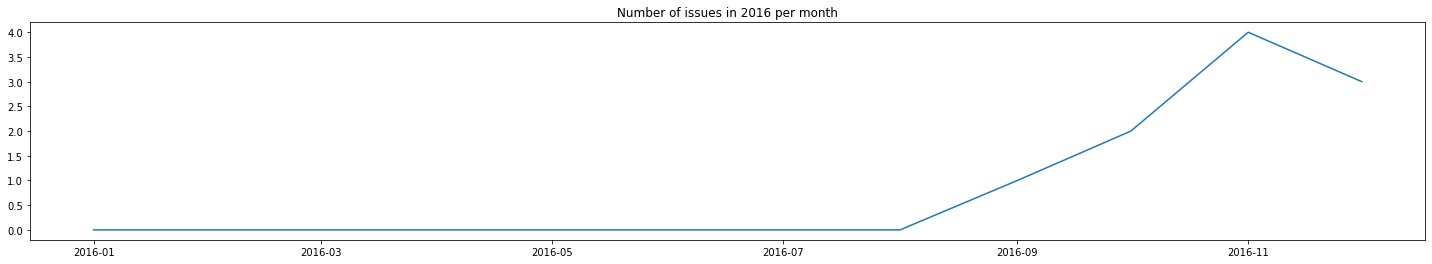

In [233]:
# plot issues evolution for each year
for year in years:
    ts = df[df['creation_year'] == year]
    plot_evolution(ts, per='M', title=f'Number of issues in {year} per month', width=25, height=4, reindex=True, reindex_freq='MS')

We can see a trend that in the first half of the year, we get more issues (module 2016 where we do not have first half period data).
Let us confirm that with some additional plot comparing the two periods.

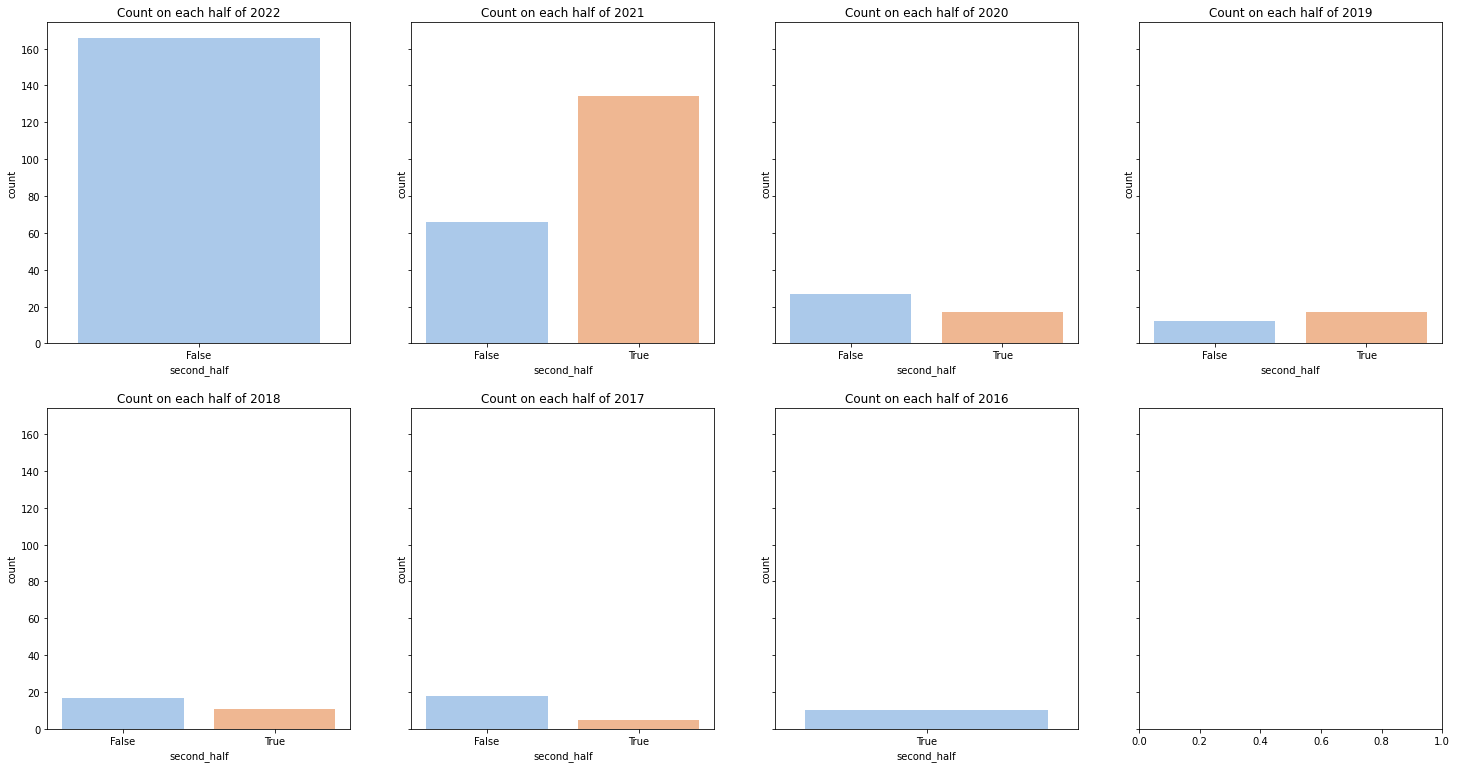

In [253]:
fig, axes = plt.subplots(2, 4, figsize=(25, 13), sharey=True)

for i, year in enumerate(years):
    ts = df[df['creation_year'] == year].copy()
    ts['second_half'] = ts['created_at'] >= pd.to_datetime(datetime(year, 7, 1), utc=True)
    sns.countplot(ax=axes[int((i)/4), i%4], x='second_half', palette='pastel', data=ts).set(title=f'Count on each half of {year}')

# Q3. Top issues reporters

How many issue reporters do we have ?

In [235]:
nb = len(df['user'].unique())
print(f'{nb} reporters')

365 reporters


In [236]:
reporters_count = df.groupby(by='user')['id'].agg(['count'])['count'].copy()
reporters_count.sort_values(ascending=False, inplace=True)
reporters_count.head()

user
jonathanhefner    20
intrip            12
kamipo            11
ghiculescu        10
ghousemohamed      8
Name: count, dtype: int64

In [237]:
reporters_count.value_counts()

1     306
2      34
3      16
4       3
20      1
12      1
11      1
10      1
8       1
5       1
Name: count, dtype: int64

In [238]:
reporters_count.describe()

count    365.000000
mean       1.369863
std        1.485339
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       20.000000
Name: count, dtype: float64

In [264]:
reporters_count.head(1)

user
jonathanhefner    20
Name: count, dtype: int64

The podium of reporters considering number of issues created

<AxesSubplot:xlabel='user'>

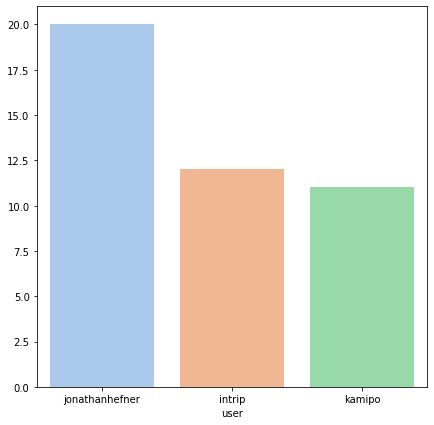

In [263]:
top_reporters = reporters_count.head(3)

plt.figure(figsize=(7, 7))
sns.barplot(x=top_reporters.index, y=top_reporters.values, palette='pastel')

# Q4. The most popular label

In [257]:
labels.head()

,PostgreSQL,With reproduction steps,actioncable,actionmailbox,actionmailer,actionpack,actiontext,actionview,activejob,activemodel,...,parallel testing,pinned,rails-ujs,railties,ready,regression,routing,security,stale,third party issue
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [260]:
labels_count = labels.sum().transpose()
labels_count.sort_values(ascending=False, inplace=True)
labels_count.head(10)

activerecord               219
attached PR                 83
With reproduction steps     52
actionpack                  48
pinned                      45
activesupport               41
activestorage               41
docs                        40
railties                    40
actionview                  31
dtype: int64

The most popular label

In [261]:
labels_count.head(1)

activerecord    219
dtype: int64

The top 5 most popular labels

<AxesSubplot:>

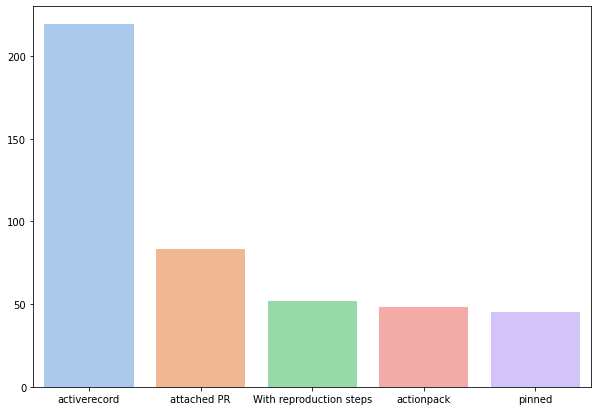

In [266]:
top_labels = labels_count.head(5)

plt.figure(figsize=(10, 7))
sns.barplot(x=top_labels.index, y=top_labels.values, palette='pastel')

# Q5. The most commented issues

In [272]:
comments_count = df.copy(deep=True)
comments_count.sort_values(by='comments', ascending=False, inplace=True)
comments_count.head(5)[['id', 'title', 'user', 'comments', 'labels', 'creation_year']]

,id,title,user,comments,labels,creation_year
396,621664652,Add Amazon SES/SNS ingress to ActionMailbox,bobf,69,"[railties, docs, pinned, actionmailbox]",2020
118,1117703269,Allow CSRF tokens to be stored outside of sess...,simbasdad,48,"[actionpack, activerecord, docs, actionview, a...",2022
419,496901128,Rails 6 inconsistently overrides ActiveJob que...,searls,41,[activejob],2019
381,670939323,Implement returning for postgresql,00dav00,38,[activerecord],2020
393,625310727,Where with block,brunvez,35,"[activerecord, stale]",2020


In [269]:
comments_count['comments'].value_counts()

0     89
2     57
4     55
1     51
3     40
6     28
9     25
7     24
5     24
8     16
10    15
12    13
11    10
13     8
14     7
15     5
22     5
16     3
19     3
20     3
28     3
17     2
18     2
21     2
31     2
48     1
23     1
24     1
27     1
35     1
38     1
41     1
69     1
Name: comments, dtype: int64